In [2]:
from IPython.display import display, Markdown, display_html
import numpy as np
import pandas as pd
import pickle
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import twitterquery as tq

In [3]:
results_dir = '../results/2019/'
def read_results_pickle(topic):
    file_dir = results_dir + topic + '/ratk_results.pickle'
    with open(file_dir, 'rb') as f:
        results_dict = pickle.load(f)

    return results_dict

def display_ratk_results(topic):
    display(Markdown("# {}   ".format(tq.utils.get_readable_topic(topic))))

    res_pd = pd.DataFrame()
    recall_confidence_intervals = {}

    methods = ['firehose', 'topk', 'cilp', 'wilp', 'cailp']
    method_names = {
        'firehose': 'Firehose',
        'topk': 'TopK',
        'cilp': 'CILP',
        'wilp': 'WILP',
        'cailp': 'CAILP'}
    res_dict = read_results_pickle(topic)
    total_ci = tq.utils.get_confidence_interval_no_decimals(res_dict['total'])
    display(Markdown("Total Number of Positive Tweets in Each Split = {}".format(total_ci)))
    for method in methods:
        positives_for_method = res_dict[method]
        total_positives = res_dict['total']
        recalls = np.divide(positives_for_method,
                            total_positives)
        recall_confidence_intervals[method] = tq.utils.get_confidence_interval_vals(recalls)
        res_pd = res_pd.append([[method_names[method], 
                                 tq.utils.get_confidence_interval_no_decimals(positives_for_method),
                                 tq.utils.get_confidence_interval(recalls)]],
                               ignore_index=True)

    res_pd.columns = ['Method', '# Positives Retrieved', 'Recall']
    display(res_pd, index=False)

    tq.utils.plot_ratk_recalls(recall_confidence_intervals, topic=topic)
    display(Markdown("---"))    

# Natural Disaster   

Total Number of Positive Tweets in Each Split = 17,497 +\- 155

,Method,# Positives Retrieved,Recall
0,Firehose,116 +\- 9,0.007 +\- 0.001
1,TopK,"4,357 +\- 154",0.249 +\- 0.010
2,CILP,"1,241 +\- 121",0.071 +\- 0.007
3,WILP,"1,046 +\- 334",0.060 +\- 0.019
4,CAILP,"7,560 +\- 1,669",0.432 +\- 0.098


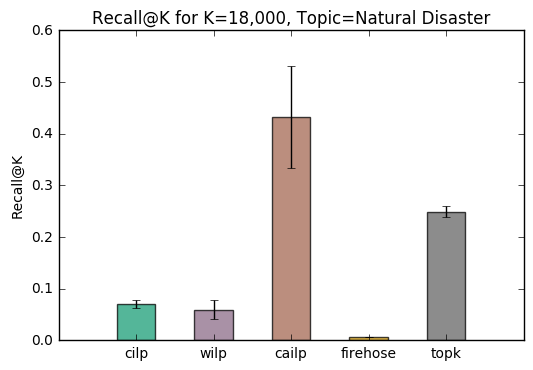

---

# Social Issues   

Total Number of Positive Tweets in Each Split = 74,698 +\- 242

,Method,# Positives Retrieved,Recall
0,Firehose,788 +\- 40,0.011 +\- 0.001
1,TopK,"5,988 +\- 33",0.080 +\- 0.000
2,CILP,"2,573 +\- 122",0.034 +\- 0.002
3,WILP,"4,905 +\- 1,270",0.066 +\- 0.017
4,CAILP,"7,510 +\- 1,401",0.101 +\- 0.019


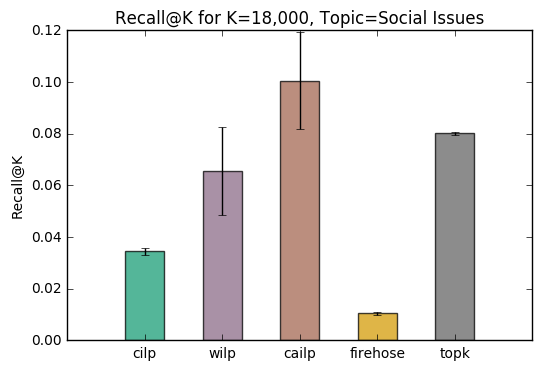

---

# Space   

Total Number of Positive Tweets in Each Split = 80,762 +\- 91

,Method,# Positives Retrieved,Recall
0,Firehose,507 +\- 23,0.006 +\- 0.000
1,TopK,"3,663 +\- 85",0.045 +\- 0.001
2,CILP,"1,488 +\- 74",0.018 +\- 0.001
3,WILP,"1,224 +\- 258",0.015 +\- 0.003
4,CAILP,"8,393 +\- 1,966",0.104 +\- 0.024


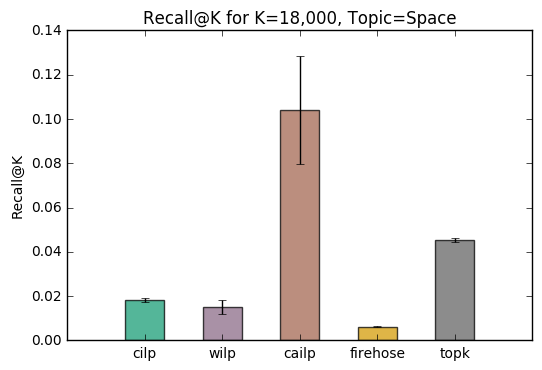

---

# Soccer   

Total Number of Positive Tweets in Each Split = 272,407 +\- 818

,Method,# Positives Retrieved,Recall
0,Firehose,"1,440 +\- 42",0.005 +\- 0.000
1,TopK,"5,850 +\- 43",0.021 +\- 0.000
2,CILP,"4,394 +\- 95",0.016 +\- 0.000
3,WILP,"4,221 +\- 312",0.015 +\- 0.001
4,CAILP,"11,177 +\- 1,211",0.041 +\- 0.004


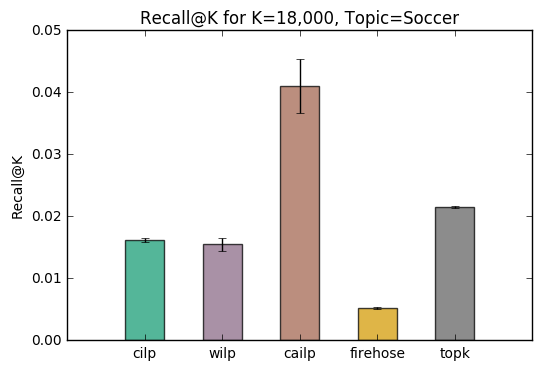

---

# Human Disasters   

Total Number of Positive Tweets in Each Split = 154,596 +\- 203

,Method,# Positives Retrieved,Recall
0,Firehose,785 +\- 54,0.005 +\- 0.000
1,TopK,"6,201 +\- 265",0.040 +\- 0.002
2,CILP,"1,264 +\- 86",0.008 +\- 0.001
3,WILP,"1,524 +\- 77",0.010 +\- 0.001
4,CAILP,"8,863 +\- 1,318",0.057 +\- 0.009


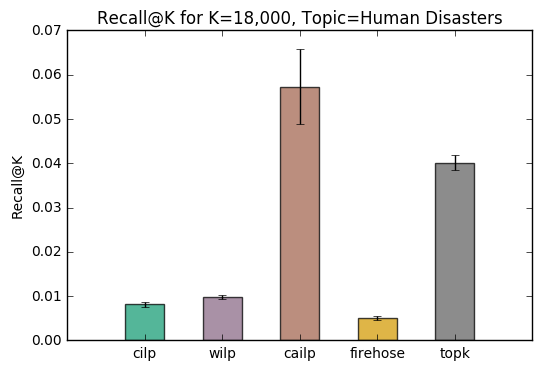

---

# Tennis   

Total Number of Positive Tweets in Each Split = 16,917 +\- 35

,Method,# Positives Retrieved,Recall
0,Firehose,32 +\- 3,0.002 +\- 0.000
1,TopK,"3,331 +\- 116",0.197 +\- 0.007
2,CILP,525 +\- 58,0.031 +\- 0.003
3,WILP,371 +\- 90,0.022 +\- 0.005
4,CAILP,"8,580 +\- 494",0.507 +\- 0.029


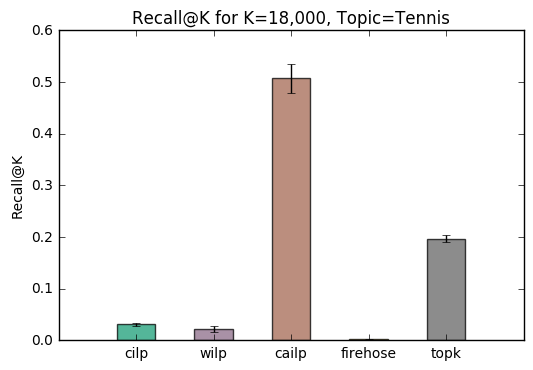

---

# Health   

Total Number of Positive Tweets in Each Split = 79,413 +\- 150

,Method,# Positives Retrieved,Recall
0,Firehose,727 +\- 51,0.009 +\- 0.001
1,TopK,"7,089 +\- 55",0.089 +\- 0.001
2,CILP,"4,460 +\- 361",0.056 +\- 0.005
3,WILP,"4,728 +\- 645",0.060 +\- 0.008
4,CAILP,"11,831 +\- 83",0.149 +\- 0.001


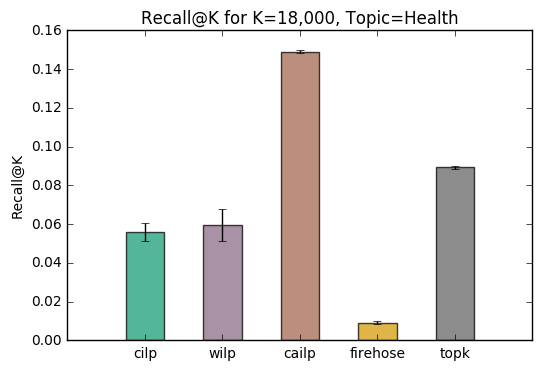

---

# LGBT   

Total Number of Positive Tweets in Each Split = 124,889 +\- 323

,Method,# Positives Retrieved,Recall
0,Firehose,917 +\- 19,0.007 +\- 0.000
1,TopK,"6,685 +\- 52",0.054 +\- 0.000
2,CILP,"2,692 +\- 66",0.022 +\- 0.000
3,WILP,"3,114 +\- 146",0.025 +\- 0.001
4,CAILP,"9,784 +\- 1,456",0.078 +\- 0.012


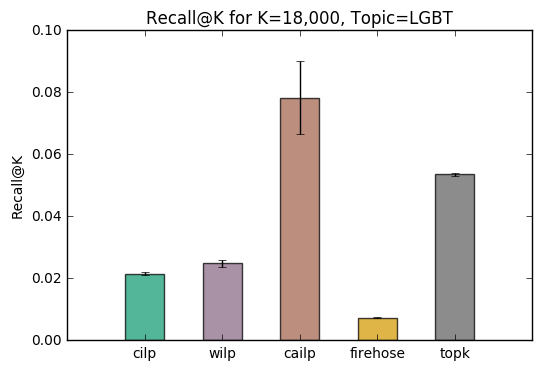

---

In [4]:
topics = tq.utils.get_topics()
for topic in topics:
    display_ratk_results(topic)